Student Name: Zhibing Liu

Student Number: 1010506515

### **1. Load the Library that may used in this code**

In [157]:
# Import all the library that we may used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot

### **2. Clean the dataset for further use**

In [158]:
# Load the dataset
# Read the input dataset file
data = pd.read_excel('../INF2178_A2_data.xlsx')
data.head()


,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [159]:
# Selecting relevant columns
columns_of_interest = ['AUSPICE', 'ADDRESS', 'PCODE', 'ward', 'bldg_type', 'TOTSPACE']
data = data[columns_of_interest]

# Handling missing values
# For simplicity, we'll drop rows with any missing values in the columns of interest
data.dropna(subset=columns_of_interest)

# Display the first few rows of the cleaned and wrangled dataframe
data.head()



,AUSPICE,ADDRESS,PCODE,ward,bldg_type,TOTSPACE
0,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,164
1,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,83
2,Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,102
3,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,65
4,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,26


### **3. Exploratory Data Analysis (EDA) & Interaction Plots**

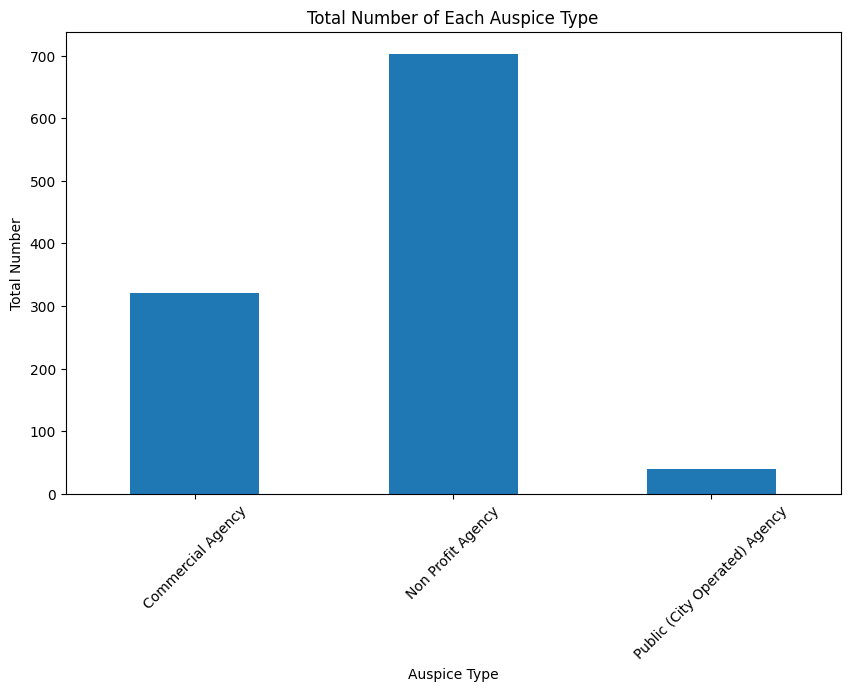

In [160]:
# Group by 'AUSPICE' and count the occurrences
auspice_counts = data.groupby('AUSPICE').size()

# Plotting
plt.figure(figsize=(10,6))
auspice_counts.plot(kind='bar')
plt.title('Total Number of Each Auspice Type')
plt.xlabel('Auspice Type')
plt.ylabel('Total Number')
plt.xticks(rotation=45)
plt.show()

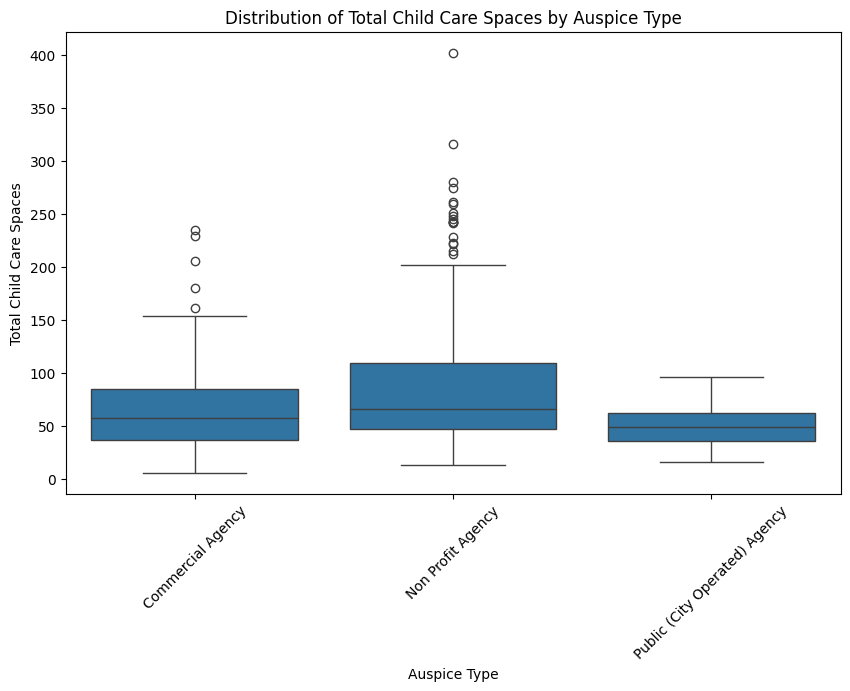

In [161]:
# Ensure 'TOTSPACE' is numeric and 'AUSPICE' is categorical
data['TOTSPACE'] = pd.to_numeric(data['TOTSPACE'], errors='coerce')
data['AUSPICE'] = data['AUSPICE'].astype('category')

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=data)
plt.title('Distribution of Total Child Care Spaces by Auspice Type')
plt.xlabel('Auspice Type')
plt.ylabel('Total Child Care Spaces')
plt.xticks(rotation=45)
plt.show()


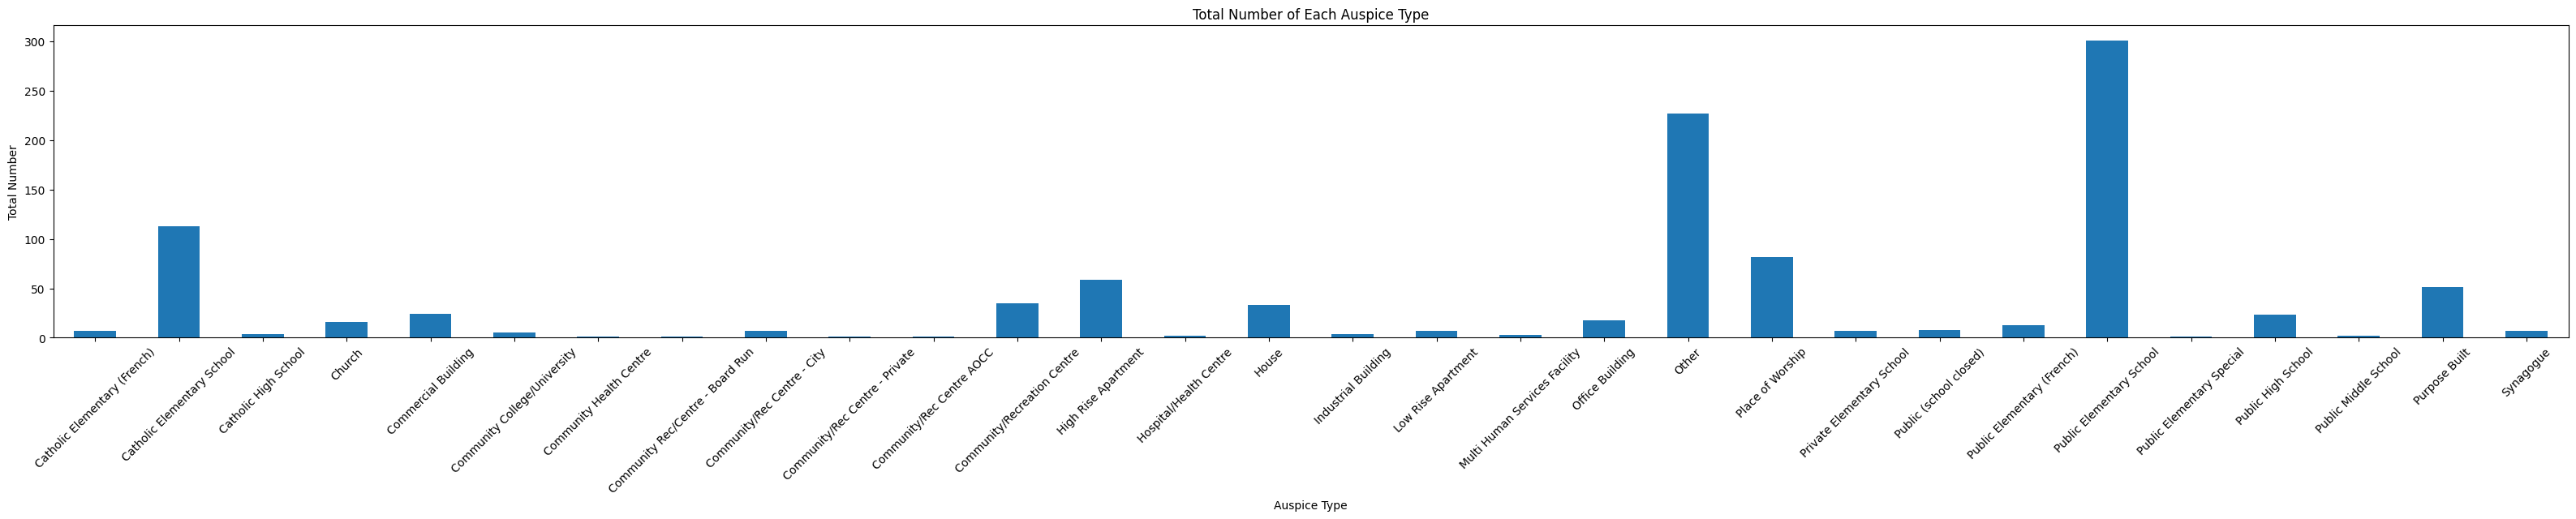

In [162]:
# Group by 'AUSPICE' and count the occurrences
auspice_counts = data.groupby('bldg_type').size()

# Plotting
plt.figure(figsize=(40,5))
auspice_counts.plot(kind='bar')
plt.title('Total Number of Each Auspice Type')
plt.xlabel('Auspice Type')
plt.ylabel('Total Number')
plt.xticks(rotation=45)
plt.show()

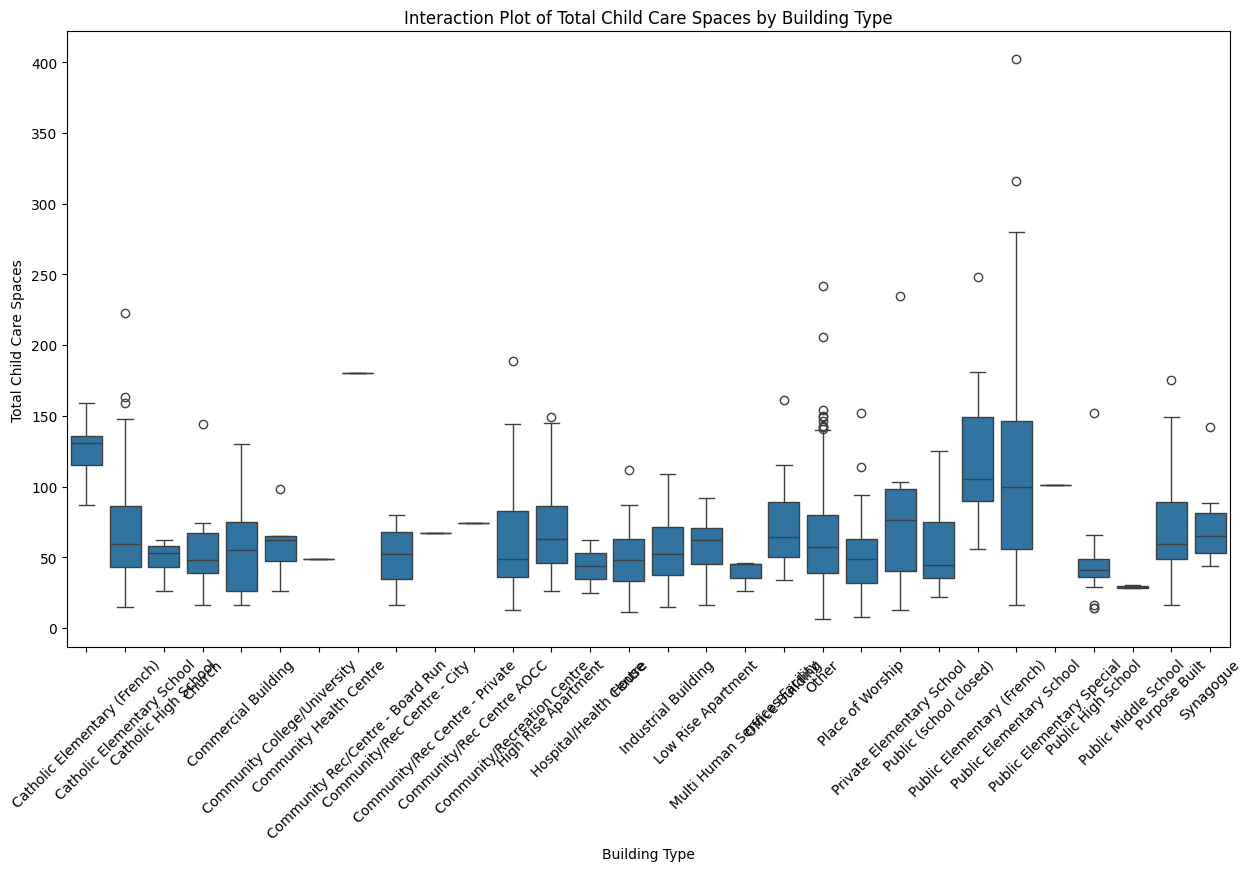

In [163]:
data['TOTSPACE'] = pd.to_numeric(data['TOTSPACE'], errors='coerce')
data['bldg_type'] = data['bldg_type'].astype('category')

# Interaction plot using a box plot for visualizing the relationship between building type and total spaces
plt.figure(figsize=(15, 8))
sns.boxplot(x='bldg_type', y='TOTSPACE', data=data)
plt.title('Interaction Plot of Total Child Care Spaces by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Total Child Care Spaces')
plt.xticks(rotation=45)
plt.show()

### **4. Auspice Impact on Child Care Spaces**

In [164]:
def format_p_value(p):
    if p < 0.001:
        return "<0.001"
    else:
        return round(p, 3)

In [165]:
# Ordinary Least Squares (OLS) model for ANOVA
model_4 = ols('TOTSPACE ~ C(AUSPICE)', data=data).fit()
anova_table = sm.stats.anova_lm(model_4, typ=2)
# Apply formatting to the p-values in the ANOVA table
anova_table['PR(>F)'] = anova_table['PR(>F)'].apply(format_p_value)
print("ANOVA Table:")
anova_table


ANOVA Table:


,sum_sq,df,F,PR(>F)
C(AUSPICE),9.611211e+04,2.0,21.843051,<0.001
Residual,2.332065e+06,1060.0,NaN,NaN


In [166]:
# Post hoc test using Tukey's HSD to compare means among auspice groups
tukey_results = pairwise_tukeyhsd(endog=data['TOTSPACE'], groups=data['AUSPICE'], alpha=0.05)
print("\nTukey's HSD Test Results:")
print(tukey_results)


Tukey's HSD Test Results:
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
      group1                  group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency  17.1194    0.0   9.7037  24.5351   True
Commercial Agency Public (City Operated) Agency -17.2152 0.0779 -35.8832   1.4528  False
Non Profit Agency Public (City Operated) Agency -34.3346    0.0 -52.4448 -16.2244   True
----------------------------------------------------------------------------------------


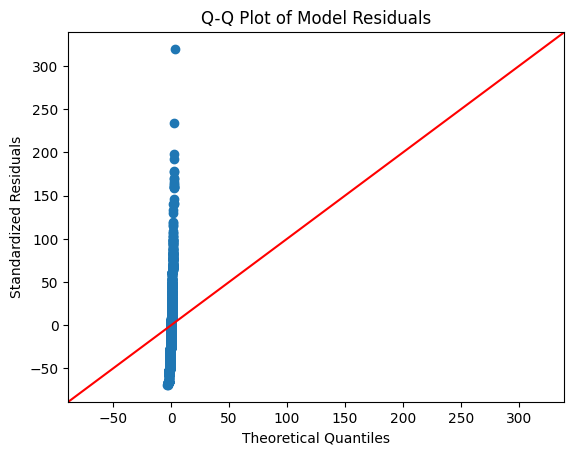

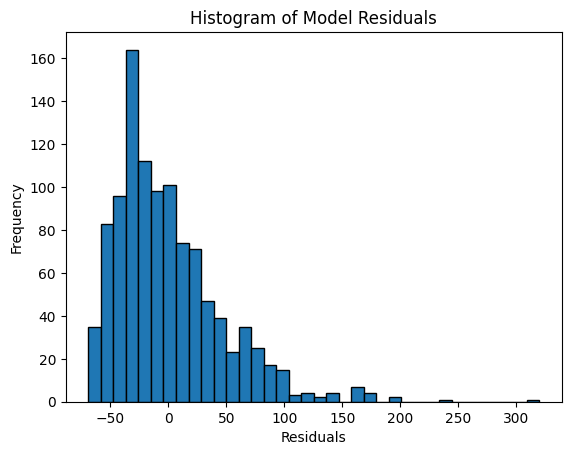

In [168]:
# Checking model diagnostics for assumptions

# Assumption 1: Normality of residuals - Q-Q plot
sm.qqplot(model_4.resid, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("Q-Q Plot of Model Residuals")
plt.show()

# Histogram of residuals
plt.hist(model_4.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram of Model Residuals")
plt.show()

In [169]:
# Assumption 1: Testing residuals' normality - Shapiro-Wilk test
w, pvalue = stats.shapiro(model_4.resid)
print(f"Shapiro-Wilk Test - W: {round(w, 3)}, p-value: {format_p_value(pvalue)}")

Shapiro-Wilk Test - W: 0.902, p-value: <0.001


In [170]:
# Assumption 2: Homogeneity of variances - Levene's test
# Extracting individual groups for Levene's test
groups = [group["TOTSPACE"].dropna() for name, group in data.groupby("AUSPICE")]

w, pvalue = stats.levene(*groups)
print(f"Levene's Test - W: {round(w, 3)}, p-value: {format_p_value(pvalue)}")

Levene's Test - W: 17.927, p-value: <0.001


### **5. Building Type and Child Care Capacity**

In [171]:
# One-way ANOVA for 'bldg_type' effect on 'TOTSPACE'
model_5 = ols('TOTSPACE ~ C(bldg_type)', data=data).fit()
anova_table = sm.stats.anova_lm(model_5, typ=2)

# Formatting p-values in the ANOVA table
anova_table['PR(>F)'] = anova_table['PR(>F)'].apply(format_p_value)

print("ANOVA Table:")
anova_table

ANOVA Table:


,sum_sq,df,F,PR(>F)
C(bldg_type),5.205689e+05,29.0,9.72056,<0.001
Residual,1.907608e+06,1033.0,NaN,NaN


In [172]:
# Perform Tukey's HSD test
res = stat()
res.tukey_hsd(df=data, res_var='TOTSPACE', xfac_var='bldg_type', anova_model='TOTSPACE ~ C(bldg_type)')

# Display the summary of Tukey's test results
tukey_summary = res.tukey_summary
print("\nTukey's HSD Test Results:")
tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 


Tukey's HSD Test Results:


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Public Elementary School,Catholic Elementary School,36.915797,19.091996,54.739597,11.011718,0.001000
1,Public Elementary School,Other,42.726214,28.524414,56.928014,15.995365,0.001000
2,Public Elementary School,High Rise Apartment,38.253280,15.251333,61.255227,8.841933,0.001000
3,Public Elementary School,Community College/University,46.280399,-26.567172,119.127969,3.377732,0.815236
4,Public Elementary School,Public High School,61.576051,26.625989,96.526113,9.367140,0.001000
...,...,...,...,...,...,...,...
430,Private Elementary School,Community Health Centre,36.714286,-135.996151,209.424723,1.130211,0.900000
431,Private Elementary School,Public Elementary Special,15.285714,-157.424723,187.996151,0.470555,0.900000
432,Community/Rec Centre AOCC,Community Health Centre,25.000000,-203.474433,253.474433,0.581762,0.900000
433,Community/Rec Centre AOCC,Public Elementary Special,27.000000,-201.474433,255.474433,0.628303,0.900000


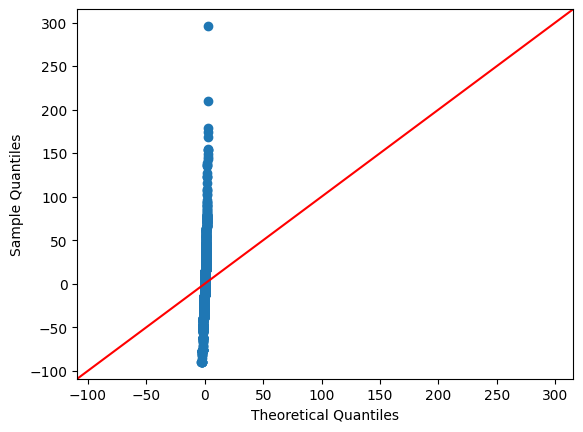

In [173]:
# Assumption checks: normality of residuals and homogeneity of variances

# Q-Q plot for normality
sm.qqplot(model_5.resid, line='45')
plt.show()

In [174]:
# Shapiro-Wilk test for normality
w, pvalue = stats.shapiro(model_5.resid)
print(f"Shapiro-Wilk Test - W: {round(w, 3)}, p-value: {format_p_value(pvalue)}")

Shapiro-Wilk Test - W: 0.937, p-value: <0.001


In [175]:
# Levene's test for homogeneity of variances
groups = [group["TOTSPACE"].dropna() for name, group in data.groupby("bldg_type")]
w, pvalue = stats.levene(*groups)
print(f"Levene's Test - W: {round(w, 3)}, p-value: {format_p_value(pvalue)}")

Levene's Test - W: 5.768, p-value: <0.001


### **6. Geographic Distribution of Child Care for Toddlers and Preschoolersy**

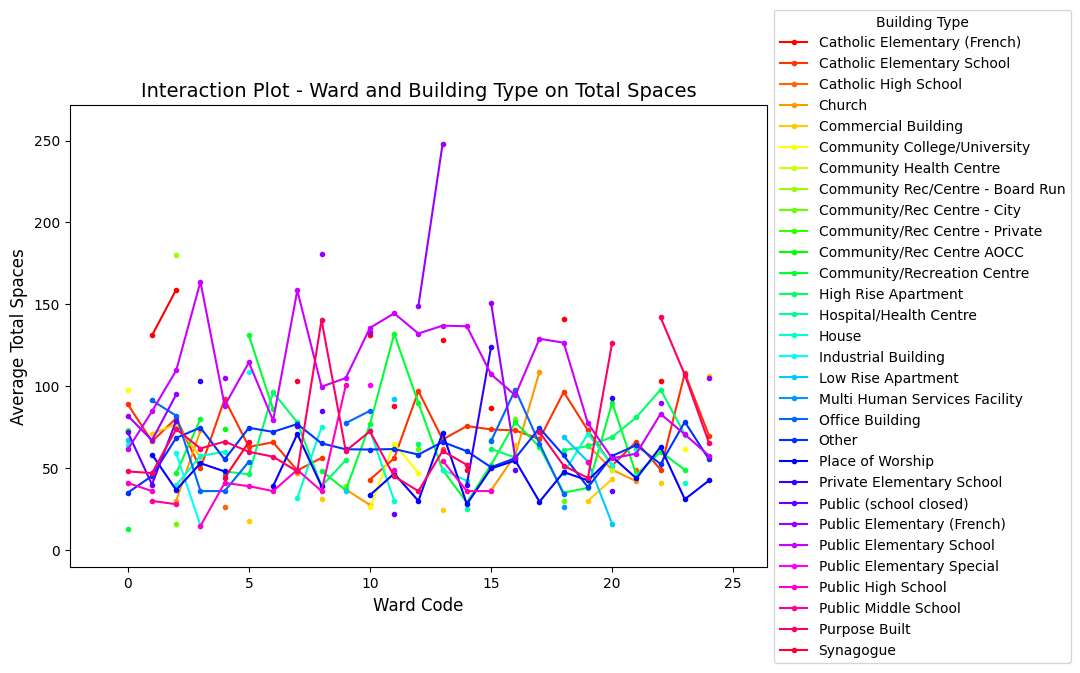

In [176]:
# Convert categorical columns to 'category' data type
data['ward'] = data['ward'].astype('category')
data['bldg_type'] = data['bldg_type'].astype('category')

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size as needed

# Generating the interaction plot on the specified axes
interaction_plot(x=data['ward'].cat.codes, trace=data['bldg_type'], response=data['TOTSPACE'], ax=ax)

# Setting title and labels
ax.set_title('Interaction Plot - Ward and Building Type on Total Spaces', fontsize=14)
ax.set_xlabel('Ward Code', fontsize=12)
ax.set_ylabel('Average Total Spaces', fontsize=12)

# Moving the legend to the left of the plot by adjusting the subplot parameters
box = ax.get_position()
ax.set_position([box.x0 - box.width * 0.1, box.y0, box.width * 0.9, box.height])  # Adjust box.x0 and box.width as needed

# Placing the legend outside the plot area to the left
ax.legend(title='Building Type', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [177]:
# Two-way ANOVA focusing on Total Spaces
model_6 = ols('TOTSPACE ~ C(ward) + C(bldg_type) + C(ward):C(bldg_type)', data=data).fit()
anova_table = sm.stats.anova_lm(model_6, typ=2)
anova_table

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 5
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 29, but rank is 9
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 696, but rank is 271
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(ward),2.604882e+05,24.0,6.166209,0.000013
C(bldg_type),2.311640e+04,29.0,0.452860,0.905837
C(ward):C(bldg_type),1.534448e+06,696.0,1.252519,0.010471
Residual,1.358864e+06,772.0,NaN,NaN


In [178]:
from statsmodels.stats.multicomp import MultiComparison

# Post-hoc test for 'ward'
mc_ward = MultiComparison(data['TOTSPACE'], data['ward'])
res_ward = mc_ward.tukeyhsd()
# Post-hoc test for 'ward' and displaying the first few rows of the summary
res_ward_df = pd.DataFrame(data=res_ward._results_table.data[1:], columns=res_ward._results_table.data[0])
res_ward_df.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,1,2,2.9688,1.0000,-36.8578,42.7953,False
1,1,3,15.1778,0.9993,-22.9134,53.2690,False
2,1,4,16.3616,0.9983,-22.3103,55.0335,False
3,1,5,1.1632,1.0000,-41.2354,43.5618,False
4,1,6,15.6025,0.9996,-25.1397,56.3447,False


In [179]:
# Post-hoc test for 'bldg_type'
mc_bldg_type = MultiComparison(data['TOTSPACE'], data['bldg_type'])
res_bldg_type = mc_bldg_type.tukeyhsd()

res_bldg_type_df = pd.DataFrame(data=res_bldg_type._results_table.data[1:], columns=res_bldg_type._results_table.data[0])
res_bldg_type_df.head()


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Catholic Elementary (French),Catholic Elementary School,-56.7497,0.1543,-119.6741,6.1747,False
1,Catholic Elementary (French),Catholic High School,-77.2143,0.4913,-178.4734,24.0448,False
2,Catholic Elementary (French),Church,-71.3393,0.0685,-144.5495,1.8709,False
3,Catholic Elementary (French),Commercial Building,-69.7976,0.0465,-139.1950,-0.4003,True
4,Catholic Elementary (French),Community College/University,-66.1143,0.6864,-160.7104,28.4818,False


In [180]:
# Combining 'ward' and 'bldg_type' for an interaction-like analysis
data['ward_bldg_interaction'] = data['ward'].astype(str) + ":" + data['bldg_type'].astype(str)

mc_interaction = MultiComparison(data['TOTSPACE'], data['ward_bldg_interaction'])
res_interaction = mc_interaction.tukeyhsd()

res_interaction_df = pd.DataFrame(data=res_interaction._results_table.data[1:], columns=res_interaction._results_table.data[0])
res_interaction_df.head()

,group1,group2,meandiff,p-adj,lower,upper,reject
0,10:Church,10:Community/Rec Centre - City,2.0000,1.0,-281.1037,285.1037,False
1,10:Church,10:Community/Recreation Centre,-0.5000,1.0,-245.6750,244.6750,False
2,10:Church,10:High Rise Apartment,17.8333,1.0,-198.3907,234.0573,False
3,10:Church,10:Low Rise Apartment,-1.0000,1.0,-284.1037,282.1037,False
4,10:Church,10:Office Building,40.5000,1.0,-183.3131,264.3131,False


In [181]:
# Test Assumption 1: Shapiro-Wilk test for normality of residuals
w, pvalue = stats.shapiro(model_6.resid)
print(f"Shapiro-Wilk Test - W: {round(w, 3)}, p-value: {format_p_value(pvalue)}")

Shapiro-Wilk Test - W: 0.936, p-value: <0.001


In [182]:
# Test Assumption 2: Levene's test for homogeneity of variances
w, pvalue = stats.levene(*[group['TOTSPACE'].values for _, group in data.groupby(['ward', 'bldg_type'])])
print(f"Levene's Test - W: {round(w, 3)}, p-value: {format_p_value(pvalue)}")

Levene's Test - W: 1.339, p-value: 0.001
